# Healthcare

## Problem Statement

NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.
The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
Build a model to accurately predict whether the patients in the dataset have diabetes or not.

In [82]:
## Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns',None)

In [83]:
dataset = pd.read_csv("diabetes.csv")

In [88]:
dataset.to_excel("Diabetes_xl.xls")

###     Data Exploration

In [84]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataset.shape

(768, 9)

In [5]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [86]:
dataset.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [7]:
diabetes_copy= dataset.copy(deep=True)

In [8]:
diabetes_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
diabetes_copy[["Glucose","BloodPressure","SkinThickness", "Insulin","BMI"]] = diabetes_copy[["Glucose","BloodPressure","SkinThickness", "Insulin","BMI"]].replace(0,np.nan, )

In [10]:
diabetes_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [11]:
diabetes_copy.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

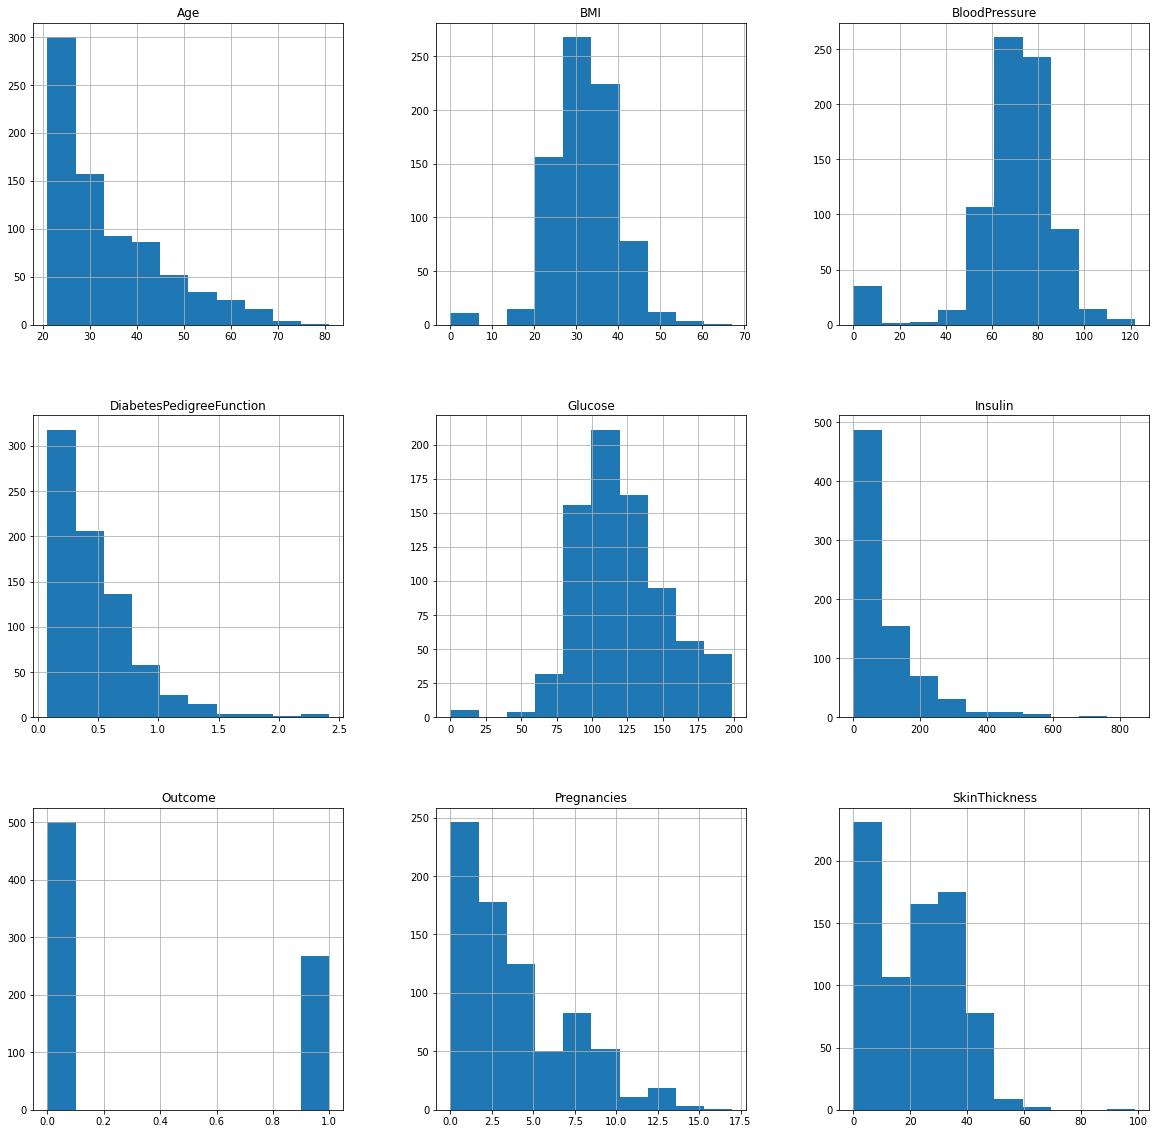

In [12]:
dataset.hist(figsize=(20,20))
plt.show()

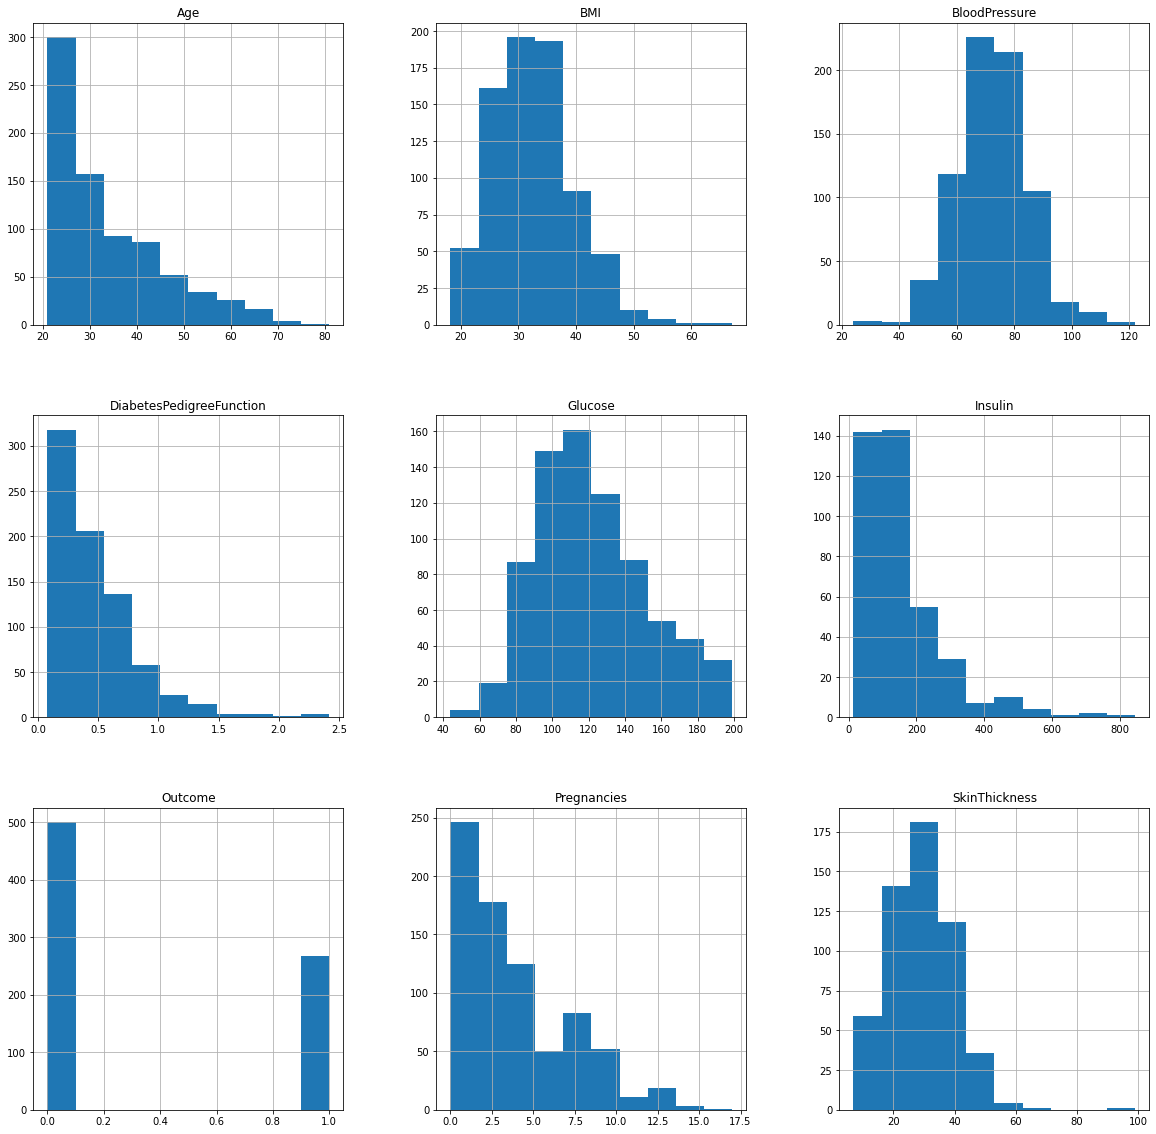

In [13]:
diabetes_copy.hist(figsize=(20,20))
plt.show()

In [14]:
diabetes_copy.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [15]:
print(diabetes_copy["Glucose"].median())
print(diabetes_copy["Glucose"].mean())

117.0
121.6867627785059


In [16]:
diabetes_copy["Glucose"].fillna(diabetes_copy["Glucose"].median(), inplace=True)

In [17]:
diabetes_copy.isna().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [18]:
print(diabetes_copy["BloodPressure"].median())
print(diabetes_copy["BloodPressure"].mean())

72.0
72.40518417462484


In [19]:
diabetes_copy["BloodPressure"].fillna(diabetes_copy["BloodPressure"].median(), inplace=True)

In [20]:
diabetes_copy.isna().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [21]:
print(diabetes_copy["BMI"].median())
print(diabetes_copy["BMI"].mean())

32.3
32.45746367239099


In [22]:
diabetes_copy["BMI"].fillna(diabetes_copy["BMI"].median(), inplace=True)

In [23]:
diabetes_copy.isna().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [24]:
print(diabetes_copy["SkinThickness"].median())
print(diabetes_copy["SkinThickness"].mean())

29.0
29.153419593345657


In [25]:
diabetes_copy["SkinThickness"].fillna(diabetes_copy["SkinThickness"].median(), inplace=True)

In [26]:
diabetes_copy.isna().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [27]:
print(diabetes_copy["Insulin"].median())
print(diabetes_copy["Insulin"].mean())

125.0
155.5482233502538


In [28]:
diabetes_copy["Insulin"].fillna(diabetes_copy["Insulin"].median(), inplace=True)

In [29]:
diabetes_copy.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

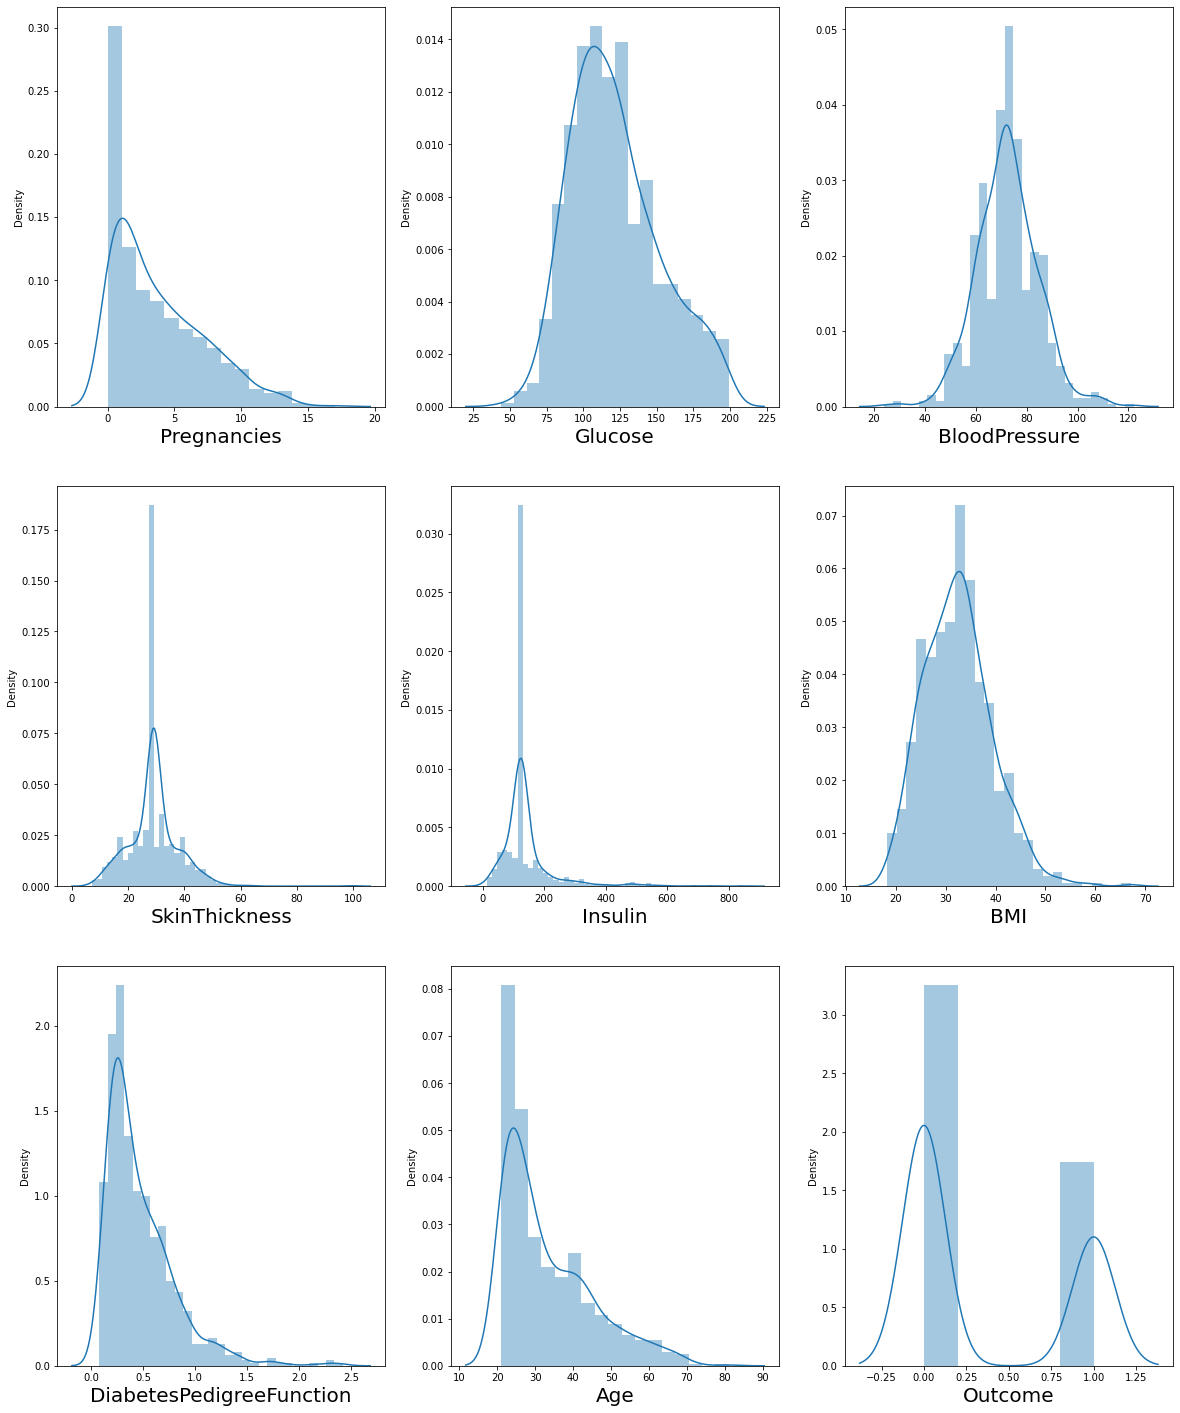

In [30]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in diabetes_copy:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(diabetes_copy[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

<AxesSubplot:>

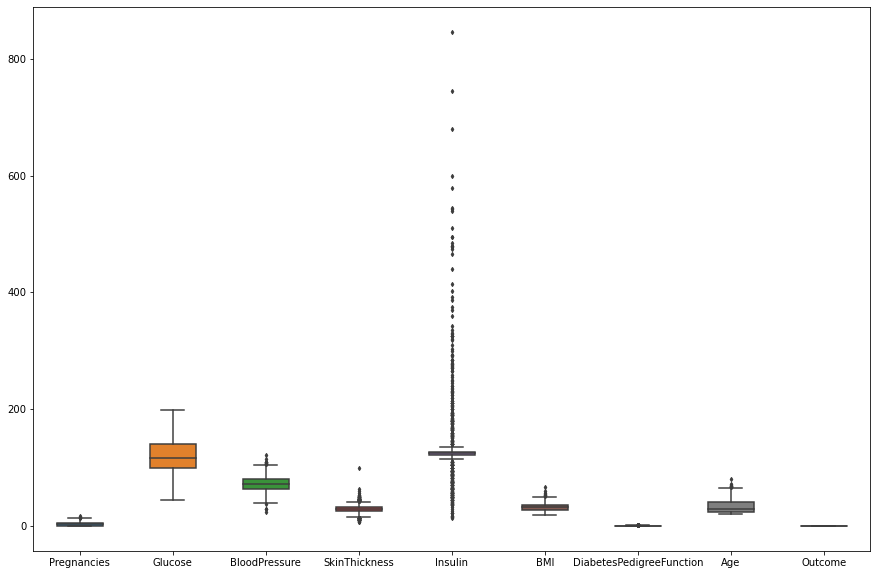

In [31]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=diabetes_copy, width= 0.5,ax=ax,  fliersize=3)

We can see multiple outliers in every features. Lets work on it 

In [32]:
q = diabetes_copy["Pregnancies"].quantile(0.98)
data_cleaned = diabetes_copy[diabetes_copy["Pregnancies"]<q]
q = data_cleaned["SkinThickness"].quantile(0.98)
data_cleaned = data_cleaned[data_cleaned["SkinThickness"]<q]
q = data_cleaned["Insulin"].quantile(0.95)
data_cleaned = data_cleaned[data_cleaned["Insulin"]<q]
q = data_cleaned["BloodPressure"].quantile(0.98)
data_cleaned = data_cleaned[data_cleaned["BloodPressure"]<q]
q = data_cleaned["BMI"].quantile(0.99)
data_cleaned = data_cleaned[data_cleaned["BMI"]<q]
q = data_cleaned["Age"].quantile(0.99)
data_cleaned = data_cleaned[data_cleaned["Age"]<q]
q = data_cleaned["DiabetesPedigreeFunction"].quantile(0.99)
data_cleaned = data_cleaned[data_cleaned["DiabetesPedigreeFunction"]<q]

In [33]:
data_cleaned.shape

(652, 9)

<AxesSubplot:>

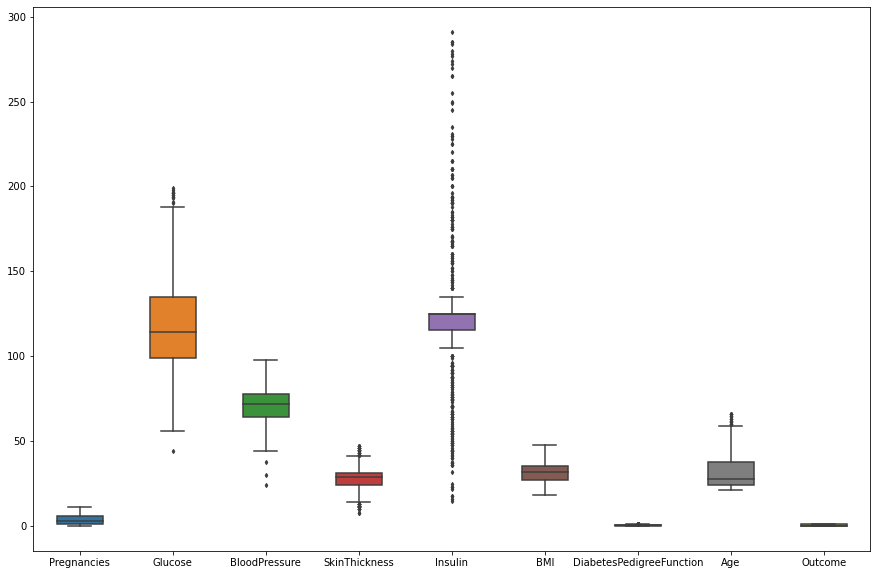

In [34]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data_cleaned, width= 0.5,ax=ax,  fliersize=3)

In [35]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 652 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 652 non-null int64
Glucose                     652 non-null float64
BloodPressure               652 non-null float64
SkinThickness               652 non-null float64
Insulin                     652 non-null float64
BMI                         652 non-null float64
DiabetesPedigreeFunction    652 non-null float64
Age                         652 non-null int64
Outcome                     652 non-null int64
dtypes: float64(6), int64(3)
memory usage: 50.9 KB


In [36]:
data_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,652.0,3.555215,2.974808,0.000,1.00000,3.0000,6.0,11.000
Glucose,652.0,118.633436,29.031616,44.000,99.00000,114.0000,135.0,199.000
BloodPressure,652.0,71.315951,10.891795,24.000,64.00000,72.0000,78.0,98.000
SkinThickness,652.0,28.105828,7.582794,8.000,24.00000,29.0000,31.0,47.000
Insulin,652.0,123.728528,43.592495,15.000,115.75000,125.0000,125.0,291.000
BMI,652.0,31.651534,6.198388,18.200,27.17500,31.6000,35.5,47.900
DiabetesPedigreeFunction,652.0,0.447252,0.284143,0.078,0.24075,0.3585,0.6,1.476
Age,652.0,32.122699,10.822985,21.000,24.00000,28.0000,38.0,66.000
Outcome,652.0,0.317485,0.465855,0.000,0.00000,0.0000,1.0,1.000


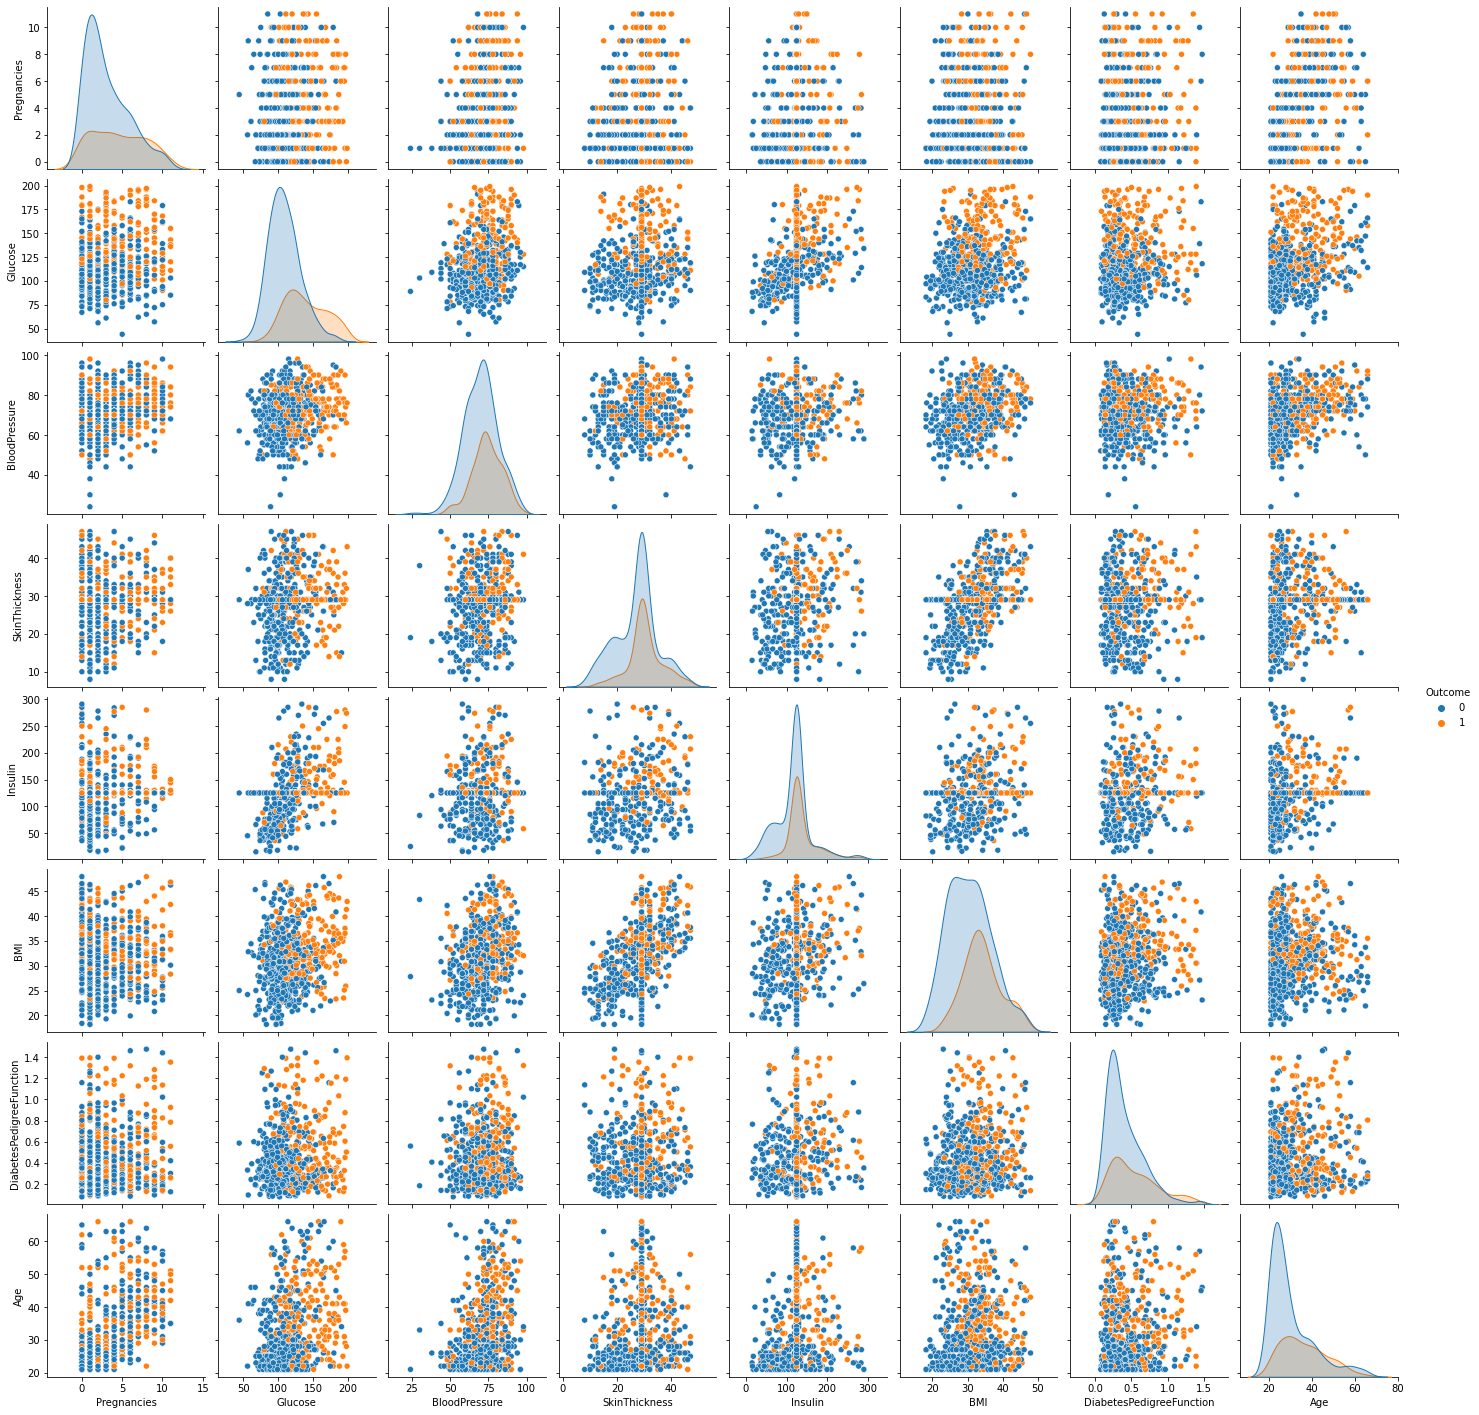

In [37]:
sns.pairplot(data_cleaned, hue="Outcome" )
plt.show()

In [38]:
data_cleaned.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.163203,0.212469,0.133722,0.066787,0.023905,0.041098,0.544356,0.228415
Glucose,0.163203,1.000000,0.234391,0.143340,0.397965,0.200521,0.097038,0.307315,0.489283
BloodPressure,0.212469,0.234391,1.000000,0.184618,0.113418,0.248621,0.040770,0.339724,0.177284
SkinThickness,0.133722,0.143340,0.184618,1.000000,0.211649,0.533868,0.027692,0.147839,0.201376
Insulin,0.066787,0.397965,0.113418,0.211649,1.000000,0.218788,0.099229,0.164532,0.231627
BMI,0.023905,0.200521,0.248621,0.533868,0.218788,1.000000,0.123706,0.073849,0.275898
DiabetesPedigreeFunction,0.041098,0.097038,0.040770,0.027692,0.099229,0.123706,1.000000,0.092506,0.224700
Age,0.544356,0.307315,0.339724,0.147839,0.164532,0.073849,0.092506,1.000000,0.264631
Outcome,0.228415,0.489283,0.177284,0.201376,0.231627,0.275898,0.224700,0.264631,1.000000


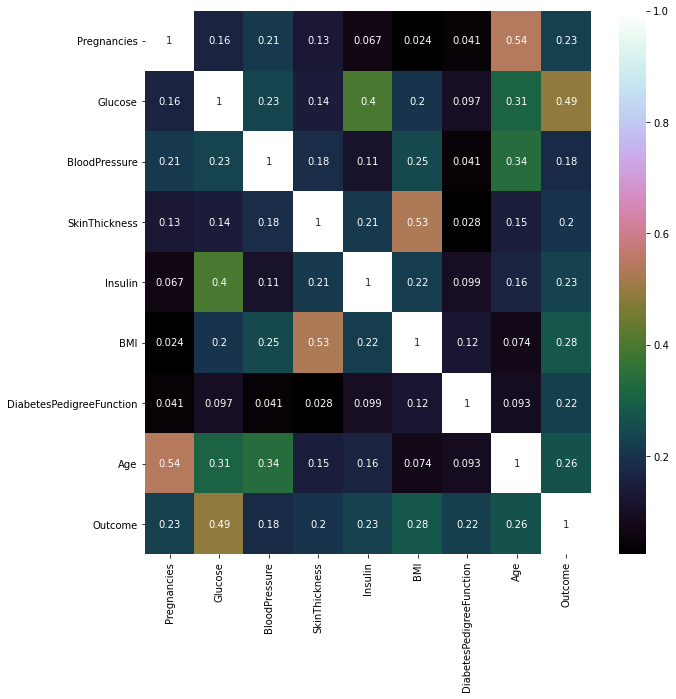

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(data_cleaned.corr(), annot=True, cmap="cubehelix")
plt.show()

As we can see that the features are not highly correlated. Hence the issue of multicollinearity is avoided

## Data Modeling

### Normalization of data

We have seen in the earlier in the distribution plots that the data is not following the normal distribution rather couple of features are skewed as well. Hence we will scale the data so that the distribution of the dataset if following a normal distribution

In [40]:
data_cleaned.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
5,5,116.0,74.0,29.0,125.0,25.6,0.201,30,0


In [41]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X =  pd.DataFrame(scalar.fit_transform(data_cleaned.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [42]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.822461,1.012314,0.062852,0.909884,0.029190,0.314592,0.633084,1.653058
1,-0.859611,-1.159400,-0.488444,0.118012,0.029190,-0.815601,-0.339003,-0.103813
2,1.495289,2.218822,-0.672209,0.118012,0.029190,-1.348406,0.791577,-0.011346
3,-0.859611,-1.021513,-0.488444,-0.673861,-0.682488,-0.573417,-0.987061,-1.028481
4,0.486046,-0.090779,0.246618,0.118012,0.029190,-0.977057,-0.867312,-0.196279


In [43]:
y=data_cleaned["Outcome"]


### Test Train Split and Cross Validation methods

In [44]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [47]:
y_pred = knn.predict(X_test)

In [48]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [49]:
print(confusion_matrix(y_test,y_pred))

[[114  35]
 [ 34  35]]


In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       149
           1       0.50      0.51      0.50        69

    accuracy                           0.68       218
   macro avg       0.64      0.64      0.64       218
weighted avg       0.68      0.68      0.68       218



In [51]:
knn.score(X_train,y_train)

1.0

In [52]:
knn.score(X_test,y_test)

0.6834862385321101

In [53]:
accuracy_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,y,cv=10)
    accuracy_rate.append(score.mean())

In [54]:
print(accuracy_rate)

[0.7163403263403264, 0.75, 0.7545920745920747, 0.753030303030303, 0.7669230769230768, 0.7622610722610722, 0.7684848484848484, 0.7637762237762237, 0.773006993006993, 0.7714918414918415, 0.7806293706293707, 0.76995337995338, 0.7637995337995338, 0.7668298368298367, 0.7714219114219114, 0.7683216783216783, 0.7744289044289043, 0.7744755244755245, 0.7775757575757576, 0.7714685314685316, 0.7775757575757576, 0.7714685314685316, 0.7775990675990676, 0.7714685314685316, 0.7730303030303031, 0.7745454545454546, 0.7683916083916082, 0.7699067599067598, 0.7698834498834499, 0.7714685314685313, 0.7745221445221444, 0.7684149184149185, 0.7653146853146853, 0.7668531468531468, 0.7637762237762237, 0.7683682983682983, 0.7745221445221444, 0.7714685314685314, 0.7714685314685316]


Text(0, 0.5, 'Accuracy Rate')

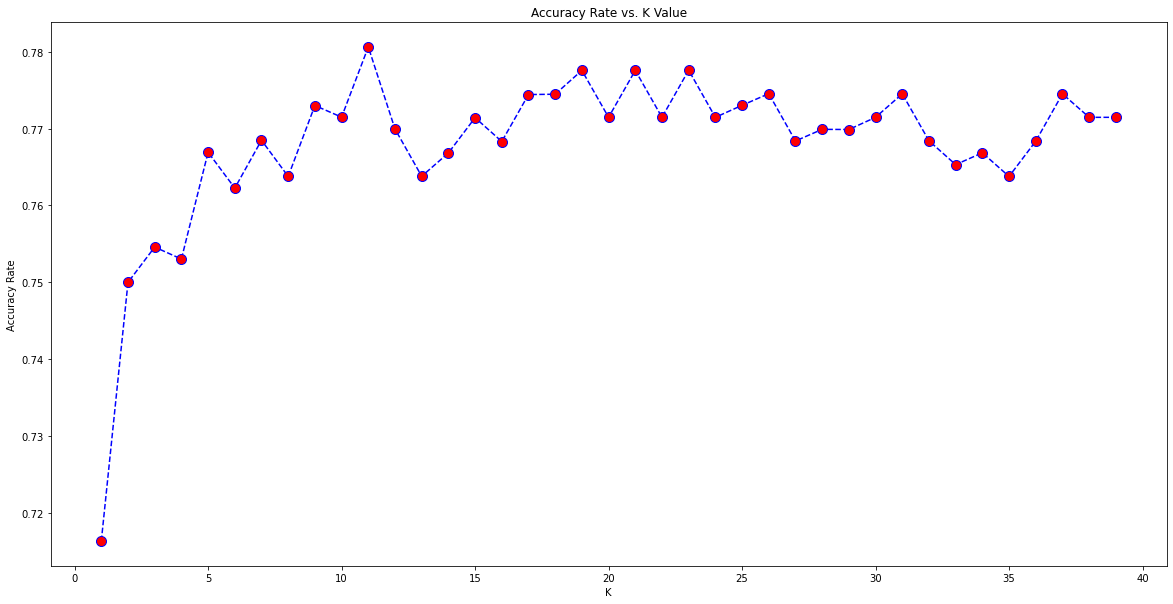

In [55]:
plt.figure(figsize=(20,10))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [56]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [57]:
from sklearn.model_selection import train_test_split, GridSearchCV
gridsearch = GridSearchCV(knn, param_grid,verbose=3)

In [58]:
gridsearch.fit(X_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.678, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.655, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.736, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.770, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.802, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.678, total=   0.0s
[CV] algorith

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.724, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.736, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.767, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.678, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.736, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.736, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.759, total= 

[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=12, score=0.814, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=13, score=0.690, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=13, score=0.747, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=13, score=0.724, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=13, score=0.793, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=13, score=0.826, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=3, score=0.678, t

[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=10, score=0.826, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=11, score=0.655, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=11, score=0.736, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=11, score=0.713, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=11, score=0.793, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=11, score=0.849, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=12, score=0.655, 

[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=13, score=0.724, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=13, score=0.793, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=13, score=0.826, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=3, score=0.678, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=3, score=0.655, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=3, score=0.736, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=3, score=0.770, tota

[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=7, score=0.759, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=7, score=0.826, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=9, score=0.667, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=9, score=0.736, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=9, score=0.701, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=9, score=0.793, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=9, score=0.826, total= 

[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=3, score=0.736, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=3, score=0.770, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=3, score=0.802, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=5, score=0.678, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=5, score=0.621, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=5, score=0.724, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=5, score=0.736, total=   0.0s
[CV] al

[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=12, score=0.747, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=12, score=0.724, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=12, score=0.793, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=12, score=0.814, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=13, score=0.690, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=13, score=0.747, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=13, score=0.724, total=   0.0s


[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=5, score=0.736, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=5, score=0.767, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=7, score=0.678, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=7, score=0.736, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=7, score=0.736, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=7, score=0.759, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=7, score=0.826, total=   0.0s
[CV] al

[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=12, score=0.747, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=12, score=0.724, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=12, score=0.793, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=12, score=0.814, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=13, score=0.690, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=13, score=0.747, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=13, score=0.724, total=   0.0s


[CV]  algorithm=brute, leaf_size=18, n_neighbors=9, score=0.826, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=10, score=0.678, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=10, score=0.747, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=10, score=0.701, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=10, score=0.770, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=10, score=0.826, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=11, score=0.655, total=   0.0s
[CV] algorithm=

[CV]  algorithm=brute, leaf_size=20, n_neighbors=12, score=0.814, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=13, score=0.690, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=13, score=0.747, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=13, score=0.724, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=13, score=0.793, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=13, score=0.826, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=3, score=0.678, total=   0.0s
[CV] algorithm=

[CV]  algorithm=brute, leaf_size=27, n_neighbors=7, score=0.736, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=7, score=0.759, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=7, score=0.826, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=9, score=0.667, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=9, score=0.736, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=9, score=0.701, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=9, score=0.793, total=   0.0s
[CV] algorithm=brute,

[CV]  algorithm=brute, leaf_size=30, n_neighbors=12, score=0.655, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=12, score=0.747, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=12, score=0.724, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=12, score=0.793, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=12, score=0.814, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=13, score=0.690, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=13, score=0.747, total=   0.0s
[CV] algorithm

[CV]  algorithm=brute, leaf_size=34, n_neighbors=10, score=0.770, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=10, score=0.826, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=11, score=0.655, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=11, score=0.736, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=11, score=0.713, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=11, score=0.793, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=11, score=0.849, total=   0.0s
[CV] algorithm

[Parallel(n_jobs=1)]: Done 840 out of 840 | elapsed:    9.5s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=39, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [59]:
gridsearch.best_params_


{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 13}

##### The best result is captured at k = 13 hence 13 is used for the final model

In [60]:
knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =18, n_neighbors=13)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [61]:
y_pred = knn.predict(X_test)

In [62]:
knn.score(X_train,y_train)

0.8087557603686636

In [63]:
knn.score(X_test,y_test)

0.7752293577981652

In [64]:
accuracy_score(y_test, y_pred)

0.7752293577981652

### Model Performance Analysis

In [65]:
print(confusion_matrix(y_test,y_pred))

[[133  16]
 [ 33  36]]


In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       149
           1       0.69      0.52      0.60        69

    accuracy                           0.78       218
   macro avg       0.75      0.71      0.72       218
weighted avg       0.77      0.78      0.77       218



In [67]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
y_pred_proba

array([0.84615385, 0.15384615, 0.76923077, 0.30769231, 0.23076923,
       0.53846154, 0.        , 0.38461538, 0.15384615, 0.53846154,
       0.53846154, 0.        , 0.23076923, 0.        , 0.        ,
       0.        , 0.07692308, 0.38461538, 0.38461538, 0.53846154,
       0.30769231, 0.92307692, 0.38461538, 0.        , 0.07692308,
       0.76923077, 0.38461538, 0.46153846, 0.07692308, 0.46153846,
       0.23076923, 0.23076923, 0.53846154, 0.30769231, 0.76923077,
       0.15384615, 0.38461538, 0.07692308, 0.        , 0.61538462,
       0.07692308, 0.30769231, 0.        , 0.53846154, 0.30769231,
       0.07692308, 0.15384615, 0.38461538, 0.07692308, 0.        ,
       0.46153846, 0.30769231, 0.38461538, 0.76923077, 0.53846154,
       0.        , 0.76923077, 0.38461538, 0.        , 0.07692308,
       0.69230769, 0.        , 0.07692308, 0.07692308, 0.38461538,
       0.15384615, 0.15384615, 0.69230769, 0.38461538, 0.23076923,
       0.46153846, 0.61538462, 0.76923077, 0.46153846, 0.23076

In [68]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
print('FPR')
print(fpr)
print('TPR')
print(tpr)
print('Thresholds')
print(thresholds)

FPR
[0.         0.         0.00671141 0.01342282 0.02013423 0.03355705
 0.10738255 0.19463087 0.29530201 0.37583893 0.5033557  0.60402685
 0.7852349  1.        ]
TPR
[0.         0.01449275 0.04347826 0.1884058  0.26086957 0.36231884
 0.52173913 0.66666667 0.76811594 0.84057971 0.91304348 0.94202899
 0.97101449 1.        ]
Thresholds
[1.92307692 0.92307692 0.84615385 0.76923077 0.69230769 0.61538462
 0.53846154 0.46153846 0.38461538 0.30769231 0.23076923 0.15384615
 0.07692308 0.        ]


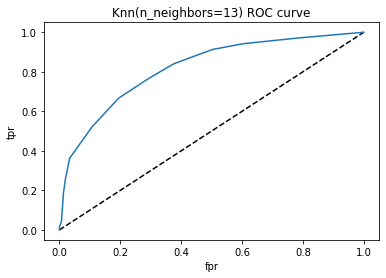

In [69]:
# Plotting the ROC Curve
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=13) ROC curve')
plt.show()

In [70]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8183056122945238

#### Training the Model Using SVC

In [71]:
from sklearn.svm import SVC

In [72]:
model = SVC()

In [73]:
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [74]:
y_pred_SVC = model.predict(X_test)

In [75]:
print(confusion_matrix(y_test,y_pred_SVC))

[[137  12]
 [ 37  32]]


In [76]:
accuracy_score(y_test, y_pred_SVC)

0.7752293577981652

#### Training with Naive Bayes 

In [77]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [78]:
y_pred_NB = classifier.predict(X_test)

In [79]:
cm = confusion_matrix(y_test, y_pred_NB)
print(cm)
accuracy_score(y_test, y_pred_NB)

[[127  22]
 [ 27  42]]


0.7752293577981652

#### We have noticed that the accuracy is the same with regards to the KNN , SVC and Naive Bayes Algorithm as well.